# M.Tech Dissertation Project
## Terrorist threat & link prediction system: Analysis & prediction of terrorist attack pattern and unrevealed hidden Links between terrorist's network 

##### Importing Libraries 

In [1]:
#Importing the required libraries for EDA (Exploratory data analysis)
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
plt.style.use('fivethirtyeight')
%matplotlib inline     
sns.set(color_codes=True)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

##### Coverting .xlsx file to .csv file 

In [2]:
# Data were take from GTD Terrorism Database inder 
# “Individual Use” includes scholarly, educational, research purposes, including classwork, theses, dissertations, and academic publication.
#convert .xlsx file to .csv file
#read_file = pd.read_excel ("globalterrorismdb_0221dist.xlsx") #Required to run Only first time UNCOMMENT ON 1st Time RUN
# Write the dataframe object
# into csv file
#read_file.to_csv ("globalterrorismdb_0221dist.csv", index = None,header=True) #Required to run Only first time UNCOMMENT ON 1st Time RUN
#print ("Xsls file converted to csv sucessfully.")

##### Loading the data into the data frame.

In [3]:
#Final_GTD_After_All_Preprocessing_Steps
#df = pd.read_csv("globalterrorismdb_0221dist.csv")
df = pd.read_csv("05_Final_GTD_After_All_Preprocessing_Steps.csv")
# To display the top 5 rows 
#df.head(5)            

In [4]:
#To Display last 05 Rows
#df.tail(5) 

##### Checking Column Heading

In [5]:
df.keys()

Index(['Year', 'Month', 'Day', 'Country_Code', 'Country_Name', 'Region_Code',
       'Region_Name', 'State', 'City', 'Latitude', 'Longitude', 'Crit1',
       'Crit2', 'Crit3', 'Terrorist_attack_or_not', 'Attack_sucess_or_not',
       'AttackType_Code', 'AttackType_Name', 'Targtype_Code', 'Targtype_Name',
       'Targsubtype_code', 'Targsubtype_Occupation', 'Group_Name',
       'Weaptype1_Code', 'Weaptype1_Name', 'Weapsubtype1_Code',
       'Weapsubtype1_Name', 'Killed', 'Wounded'],
      dtype='object')

##### Checking the types of data

In [6]:
df.dtypes

Year                         int64
Month                        int64
Day                          int64
Country_Code                 int64
Country_Name                object
Region_Code                  int64
Region_Name                 object
State                       object
City                        object
Latitude                   float64
Longitude                  float64
Crit1                        int64
Crit2                        int64
Crit3                        int64
Terrorist_attack_or_not      int64
Attack_sucess_or_not         int64
AttackType_Code              int64
AttackType_Name             object
Targtype_Code                int64
Targtype_Name               object
Targsubtype_code           float64
Targsubtype_Occupation      object
Group_Name                  object
Weaptype1_Code               int64
Weaptype1_Name              object
Weapsubtype1_Code          float64
Weapsubtype1_Name           object
Killed                     float64
Wounded             

##### Renaming the columns

In [7]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country':'Country_Code','country_txt':'Country_Name','region':'Region_Code','region_txt':'Region_Name','provstate':'State','city':'City','latitude':'Latitude','longitude':'Longitude','crit1': 'Crit1','crit2': 'Crit2','crit3': 'Crit3','doubtterr':'Terrorist_attack_or_not','success':'Attack_sucess_or_not','attacktype1':'AttackType_Code','attacktype1_txt':'AttackType_Name','targtype1':'Targtype_Code','targtype1_txt':'Targtype_Name','targsubtype1':'Targsubtype_code','targsubtype1_txt':'Targsubtype_Occupation','gname':'Group_Name','weaptype1':'Weaptype1_Code','weaptype1_txt':'Weaptype1_Name','weapsubtype1':'Weapsubtype1_Code','weapsubtype1_txt':'Weapsubtype1_Name','nkill':'Killed','nwound':'Wounded'},inplace=True)

##### Dropping irrelevant columns

In [38]:
#df=df[['Year','Month','Day','Country_Code','Country_Name','Region_Code','Region_Name','State','City','Latitude','Longitude','Crit1','Crit2','Crit3','Terrorist_attack_or_not','Attack_sucess_or_not','AttackType_Code','AttackType_Name','Targtype_Code','Targtype_Name','Targsubtype_code','Targsubtype_Occupation','Group_Name','Weaptype1_Code','Weaptype1_Name','Weapsubtype1_Code','Weapsubtype1_Name','Killed','Wounded']] 
df=df[['Crit1','Crit2','Crit3','Terrorist_attack_or_not','Attack_sucess_or_not']] 

##### Again Checking for Column Names

In [39]:
#df.describe()
df.keys()

Index(['Crit1', 'Crit2', 'Crit3', 'Terrorist_attack_or_not',
       'Attack_sucess_or_not'],
      dtype='object')

##### Again Checking for Data Type

In [9]:
df.dtypes

Year                         int64
Month                        int64
Day                          int64
Country_Code                 int64
Country_Name                object
Region_Code                  int64
Region_Name                 object
State                       object
City                        object
Latitude                   float64
Longitude                  float64
Crit1                        int64
Crit2                        int64
Crit3                        int64
Terrorist_attack_or_not      int64
Attack_sucess_or_not         int64
AttackType_Code              int64
AttackType_Name             object
Targtype_Code                int64
Targtype_Name               object
Targsubtype_code           float64
Targsubtype_Occupation      object
Group_Name                  object
Weaptype1_Code               int64
Weaptype1_Name              object
Weapsubtype1_Code          float64
Weapsubtype1_Name           object
Killed                     float64
Wounded             

In [10]:
df.head(10)

,Year,Month,Day,Country_Code,Country_Name,Region_Code,Region_Name,State,City,Latitude,...,Targtype_Name,Targsubtype_code,Targsubtype_Occupation,Group_Name,Weaptype1_Code,Weaptype1_Name,Weapsubtype1_Code,Weapsubtype1_Name,Killed,Wounded
0,1970,1,1,217,United States,1,North America,Illinois,Cairo,37.005105,...,Police,22.0,"Police Building (headquarters, station, school)",Black Nationalists,5,Firearms,5.0,Unknown Gun Type,0.0,0.0
1,1970,1,2,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,...,Police,25.0,Police Security Forces/Officers,Tupamaros (Uruguay),5,Firearms,2.0,Automatic or Semi-Automatic Rifle,0.0,0.0
2,1970,1,2,217,United States,1,North America,California,Oakland,37.791927,...,Utilities,107.0,Electricity,Anti-Abortion extremists,6,Explosives,16.0,Unknown Explosive Type,0.0,0.0
3,1970,1,2,217,United States,1,North America,Wisconsin,Madison,43.076592,...,Military,28.0,Military Recruiting Station/Academy,New Year's Gang,8,Incendiary,19.0,Molotov Cocktail/Petrol Bomb,0.0,0.0
4,1970,1,3,217,United States,1,North America,Wisconsin,Madison,43.072950,...,Government (General),21.0,Government Building/Facility/Office,New Year's Gang,8,Incendiary,20.0,Gasoline or Alcohol,0.0,0.0
5,1970,1,1,217,United States,1,North America,Wisconsin,Baraboo,43.468500,...,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,"Weather Underground, Weathermen",6,Explosives,16.0,Unknown Explosive Type,0.0,0.0
6,1970,1,6,217,United States,1,North America,Colorado,Denver,39.758968,...,Military,28.0,Military Recruiting Station/Academy,Left-Wing Militants,8,Incendiary,19.0,Molotov Cocktail/Petrol Bomb,0.0,0.0
7,1970,1,8,98,Italy,8,Western Europe,Lazio,Rome,41.890961,...,Airports & Aircraft,42.0,Aircraft (not at an airport),Irish Republican Army (IRA),5,Firearms,4.0,Rifle/Shotgun (non-automatic),0.0,0.0
8,1970,1,9,217,United States,1,North America,Michigan,Detroit,42.331685,...,Government (General),21.0,Government Building/Facility/Office,Left-Wing Militants,8,Incendiary,19.0,Molotov Cocktail/Petrol Bomb,0.0,0.0
9,1970,1,9,217,United States,1,North America,Puerto Rico,Rio Piedras,18.386932,...,Business,7.0,Retail/Grocery/Bakery,Armed Commandos of Liberation,8,Incendiary,18.0,Arson/Fire,0.0,0.0


###### Data Preprocessing

In [41]:
#df.to_csv('newout.csv', index = None,header=True)
df.to_csv('00_GTD_DF_FOR_ATTACK_OR_NOT.csv', index = None,header=True)

In [11]:
df.shape

(141036, 29)

In [23]:
#Replace unknown Cities, Attack Types and Target Types to the most frequent Cities, Attack Types and Target Types in that specific Country
#NO NEED TO RUN EVERY TIME IF already RUN
def replace(i,key):
    search = df['Country_Code'][i]
    country = df[df.Country_Code == search]
    if country[key].count() == 1:
        return df['Country_Name'][i]

    temp = dict(country.groupby([key]).size())
    del temp['Unknown']
    maxtemp = max(zip(temp.values(), temp.keys()))[1]        
    return maxtemp
    
create = ['City','AttackType_Name','Targtype_Name']

for j in create:
    for i in range(len(df[j])):
        if df[j][i] == 'Unknown':
            df[j][i] = replace(i,j)

In [24]:
df.to_csv('newout_After_Repl_Null_City_Attack_Type_Target_Type.csv', index = None,header=True)

In [12]:
df.shape

(141036, 29)

In [26]:
#Replace unknown Group Names and Weapon Types to the most frequent Group Names and Weapon Types in that specific Region.
#NO NEED TO RUN EVERY TIME IF already RUN
def replace1(i,key):
    search = df['Region_Code'][i]
    country = df[df.Region_Code == search]

    temp = dict(country.groupby([key]).size())
    del temp['Unknown']
    maxtemp = max(zip(temp.values(), temp.keys()))[1]        
    return maxtemp

create = ['Group_Name','Weaptype1_Name']
for j in create:
    for i in range(len(df[j])):
        if df[j][i] == 'Unknown':
            df[j][i] = replace1(i,j)
#df.to_csv('newout.csv')

In [10]:
#Replace unknown Month and Day Types to the most frequent Month and Day in that specific Year.
#NO NEED TO RUN EVERY TIME IF already RUN
def replace1(i,key):
    search = df['Year'][i]
    Year = df[df.Year == search]
    temp = dict(Year.groupby([key]).size())
    del temp['Unknown']
    maxtemp = max(zip(temp.values(), temp.keys()))[1]        
    return maxtemp

create = ['Month','Day']
for j in create:
    for i in range(len(df[j])):
        if df[j][i] == 'Unknown':
            df[j][i] = replace1(i,j)
df.to_csv('With_NO_ZERO__MONTH_DAY.csv')

In [12]:
df[df.eq(-9).Terrorist_attack_or_not]


,Year,Month,Day,Country_Code,Country_Name,Region_Code,Region_Name,State,City,Latitude,...,Targtype_Name,Targsubtype_code,Targsubtype_Occupation,Group_Name,Weaptype1_Code,Weaptype1_Name,Weapsubtype1_Code,Weapsubtype1_Name,Killed,Wounded
7,1970,1,8,98,Italy,8,Western Europe,Lazio,Rome,41.890961,...,Airports & Aircraft,42.0,Aircraft (not at an airport),Irish Republican Army (IRA),5,Firearms,4.0,Rifle/Shotgun (non-automatic),0.0,0.0
52,1970,2,16,217,United States,1,North America,California,Berkeley,37.874043,...,Business,7.0,Retail/Grocery/Bakery,Anti-Abortion extremists,6,Explosives,16.0,Unknown Explosive Type,0.0,0.0
281,1970,6,19,217,United States,1,North America,California,Berkeley,37.874043,...,Business,3.0,Bank/Commerce,Anti-Abortion extremists,6,Explosives,16.0,Unknown Explosive Type,0.0,0.0
311,1970,7,7,217,United States,1,North America,New York,New York City,40.697132,...,Business,11.0,Entertainment/Cultural/Stadium/Casino,Anti-Abortion extremists,6,Explosives,16.0,Unknown Explosive Type,0.0,0.0
317,1970,7,12,217,United States,1,North America,California,Palo Alto,37.424305,...,Business,3.0,Bank/Commerce,Anti-Abortion extremists,6,Explosives,16.0,Unknown Explosive Type,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39585,1997,12,28,6,Algeria,10,Middle East & North Africa,Djelfa,Djelfa,34.666667,...,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Islamic State of Iraq and the Levant (ISIL),9,Melee,23.0,Knife or Other Sharp Object,7.0,0.0
39586,1997,12,28,6,Algeria,10,Middle East & North Africa,Sidi Bel Abbes,Telagh,36.084918,...,Private Citizens & Property,73.0,Vehicles/Transportation,Islamic State of Iraq and the Levant (ISIL),6,Explosives,16.0,Unknown Explosive Type,2.0,0.0
39597,1997,12,30,213,Uganda,11,Sub-Saharan Africa,Northern,Kampala,2.878003,...,Private Citizens & Property,73.0,Vehicles/Transportation,Al-Shabaab,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",3.0,7.0
39600,1997,12,30,45,Colombia,3,South America,Valle del Cauca,Cali,3.429344,...,Business,4.0,Multinational Corporation,Shining Path (SL),6,Explosives,16.0,Unknown Explosive Type,0.0,0.0


In [27]:
df.to_csv('newout_After_Group_Name_Wepon_Type_without_Null_Repeat_Row_Removed.csv', index = None,header=True)

In [28]:
df.shape

(201183, 29)

##### Dropping the duplicate rows

In [29]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (12694, 29)


In [30]:
df = df.drop_duplicates()
df.head(5)

,Year,Month,Day,Country_Code,Country_Name,Region_Code,Region_Name,State,City,Latitude,...,Targtype_Name,Targsubtype_code,Targsubtype_Occupation,Group_Name,Weaptype1_Code,Weaptype1_Name,Weapsubtype1_Code,Weapsubtype1_Name,Killed,Wounded
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,...,Private Citizens & Property,68.0,Named Civilian,MANO-D,13,Firearms,NaN,NaN,1.0,0.0
1,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,...,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,13,Explosives,NaN,NaN,0.0,0.0
2,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Manila,15.478598,...,Journalists & Media,54.0,Radio Journalist/Staff/Facility,New People's Army (NPA),13,Firearms,NaN,NaN,1.0,0.0
3,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,...,Government (Diplomatic),46.0,Embassy/Consulate,Irish Republican Army (IRA),6,Explosives,16.0,Unknown Explosive Type,NaN,NaN
4,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,...,Government (Diplomatic),46.0,Embassy/Consulate,Uighur Separatists,8,Incendiary,NaN,NaN,NaN,NaN


In [15]:
df.count()      # Used to count the number of rows

Crit1                      141036
Crit2                      141036
Crit3                      141036
Terrorist_attack_or_not    141036
Attack_sucess_or_not       141036
dtype: int64

##### Dropping the missing or null values.

In [13]:
print(df.isnull().sum())

Year                       0
Month                      0
Day                        0
Country_Code               0
Country_Name               0
Region_Code                0
Region_Name                0
State                      0
City                       0
Latitude                   0
Longitude                  0
Crit1                      0
Crit2                      0
Crit3                      0
Terrorist_attack_or_not    0
Attack_sucess_or_not       0
AttackType_Code            0
AttackType_Name            0
Targtype_Code              0
Targtype_Name              0
Targsubtype_code           0
Targsubtype_Occupation     0
Group_Name                 0
Weaptype1_Code             0
Weaptype1_Name             0
Weapsubtype1_Code          0
Weapsubtype1_Name          0
Killed                     0
Wounded                    0
dtype: int64


In [14]:
df = df.dropna()    # Dropping the missing values.
df.count()

Year                       141036
Month                      141036
Day                        141036
Country_Code               141036
Country_Name               141036
Region_Code                141036
Region_Name                141036
State                      141036
City                       141036
Latitude                   141036
Longitude                  141036
Crit1                      141036
Crit2                      141036
Crit3                      141036
Terrorist_attack_or_not    141036
Attack_sucess_or_not       141036
AttackType_Code            141036
AttackType_Name            141036
Targtype_Code              141036
Targtype_Name              141036
Targsubtype_code           141036
Targsubtype_Occupation     141036
Group_Name                 141036
Weaptype1_Code             141036
Weaptype1_Name             141036
Weapsubtype1_Code          141036
Weapsubtype1_Name          141036
Killed                     141036
Wounded                    141036
dtype: int64

In [36]:
print(df.isnull().sum())   # After dropping the values

Year                       0
Month                      0
Day                        0
Country_Code               0
Country_Name               0
Region_Code                0
Region_Name                0
State                      0
City                       0
Latitude                   0
Longitude                  0
Crit1                      0
Crit2                      0
Crit3                      0
Terrorist_attack_or_not    0
Attack_sucess_or_not       0
AttackType_Code            0
AttackType_Name            0
Targtype_Code              0
Targtype_Name              0
Targsubtype_code           0
Targsubtype_Occupation     0
Group_Name                 0
Weaptype1_Code             0
Weaptype1_Name             0
Weapsubtype1_Code          0
Weapsubtype1_Name          0
Killed                     0
Wounded                    0
dtype: int64


In [35]:
df.to_csv('Final_GTD_After_All_Preprocessing_Steps.csv', index = None,header=True)

<AxesSubplot:xlabel='Killed'>

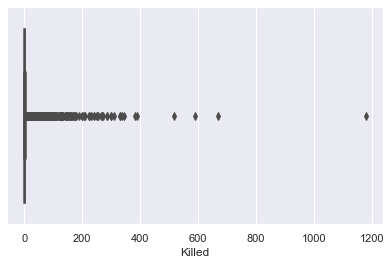

In [57]:
sns.boxplot(x=df['Killed'])

<AxesSubplot:xlabel='Year'>

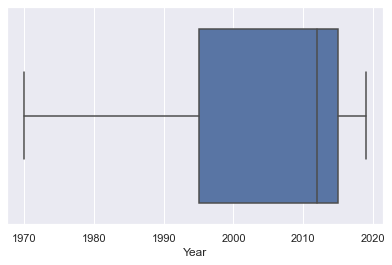

In [59]:
sns.boxplot(x=df['Year'])

In [60]:
df.describe()

,Year,Month,Day,Country_Code,Region_Code,Latitude,Longitude,AttackType_Code,Targtype_Code,Targsubtype_code,Weaptype1_Code,Weapsubtype1_Code,Killed,Wounded
count,140902.000000,140902.000000,140902.000000,140902.000000,140902.000000,140902.000000,140902.000000,140902.000000,140902.000000,140902.000000,140902.000000,140902.000000,140902.000000,140902.000000
mean,2005.558864,6.449809,15.568125,128.741239,7.342827,23.864877,33.952432,2.818597,7.945522,46.326319,5.783956,10.976729,2.227456,3.411655
std,12.484372,3.388729,8.795374,102.711650,2.827931,17.588175,55.029113,1.366998,6.264946,30.266752,0.861633,6.528490,8.511377,18.253306
min,1970.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-157.858333,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000
25%,1995.000000,4.000000,8.000000,92.000000,6.000000,12.184529,13.182591,2.000000,3.000000,22.000000,5.000000,5.000000,0.000000,0.000000
50%,2012.000000,6.000000,15.000000,101.000000,7.000000,31.600629,44.341636,3.000000,4.000000,34.000000,6.000000,11.000000,1.000000,0.000000
75%,2015.000000,9.000000,23.000000,160.000000,10.000000,34.438094,69.831708,3.000000,14.000000,73.000000,6.000000,16.000000,2.000000,2.000000
max,2019.000000,12.000000,31.000000,1004.000000,12.000000,74.633553,178.441900,9.000000,22.000000,113.000000,9.000000,31.000000,1180.000000,4000.000000


##### Data Visualization 


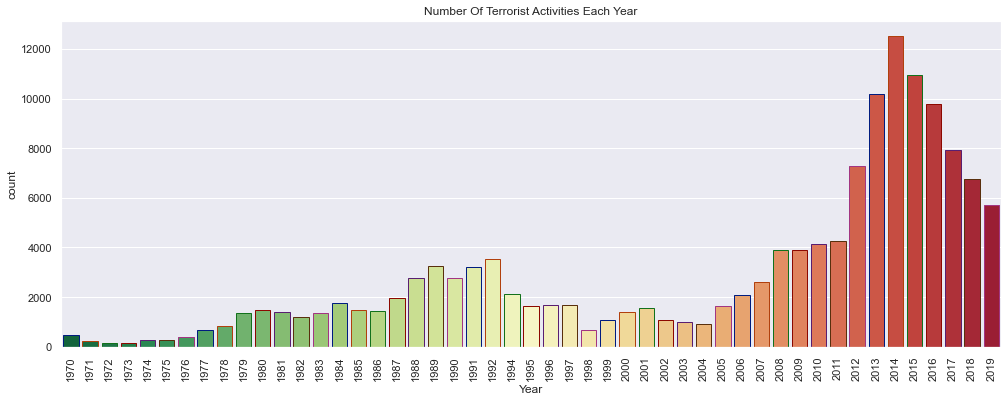

In [12]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

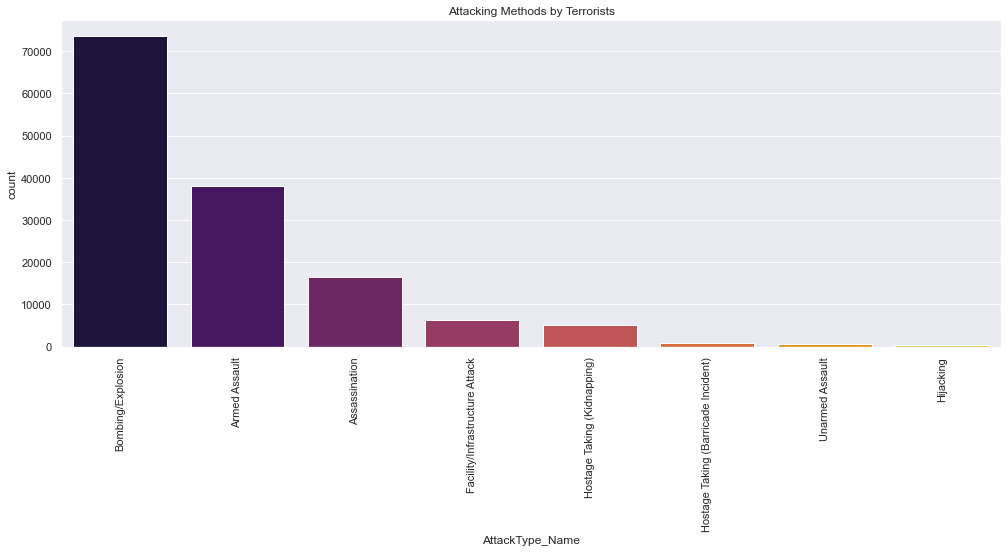

In [13]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType_Name',data=df,palette='inferno',order=df['AttackType_Name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

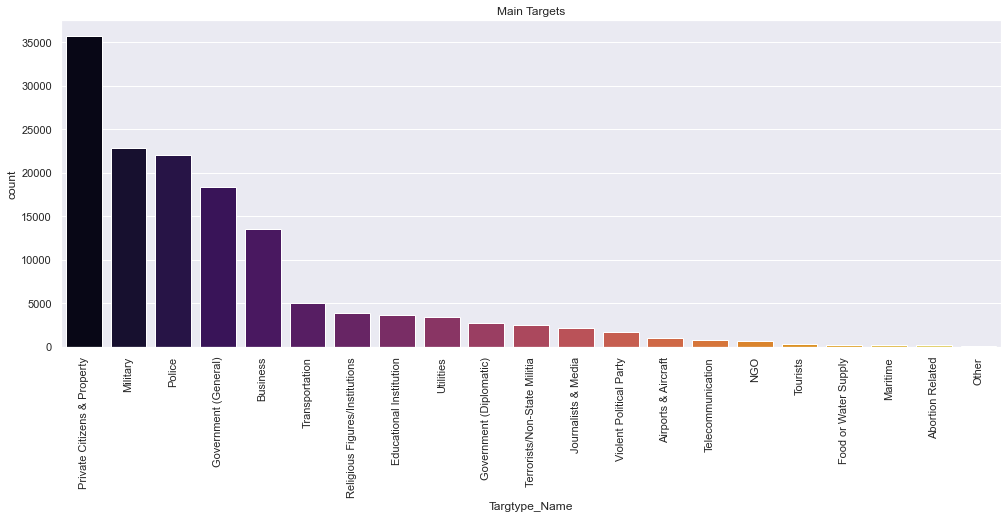

In [16]:
plt.subplots(figsize=(15,6))
sns.countplot(df['Targtype_Name'],palette='inferno',order=df['Targtype_Name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Main Targets')
plt.show()

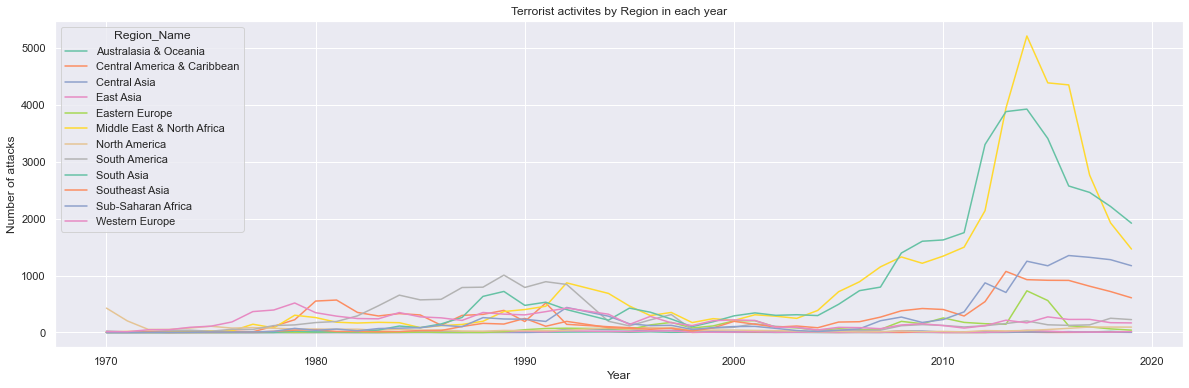

In [17]:
terror_region=pd.crosstab(df.Year,df.Region_Name)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Terrorist activites by Region in each year')
plt.ylabel("Number of attacks")
plt.show()

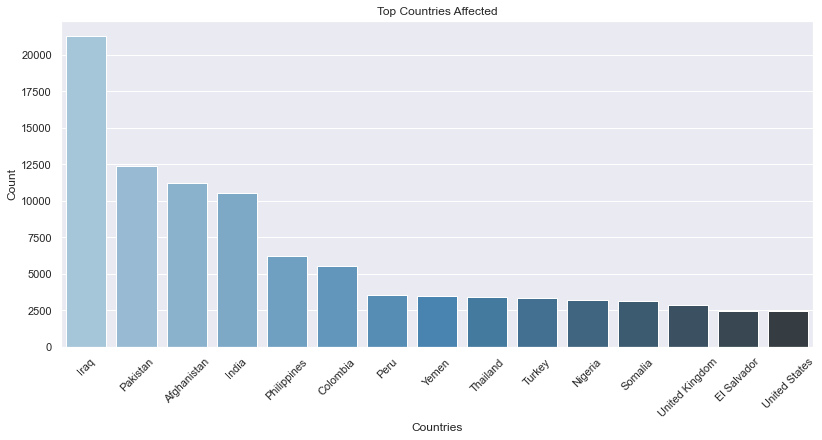

In [20]:
## Countries affected by terrorism
attack_country = df.Country_Name.value_counts()[:15]
#attack_country
plt.subplots(figsize=(12,6))
sns.barplot(attack_country.index,attack_country.values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

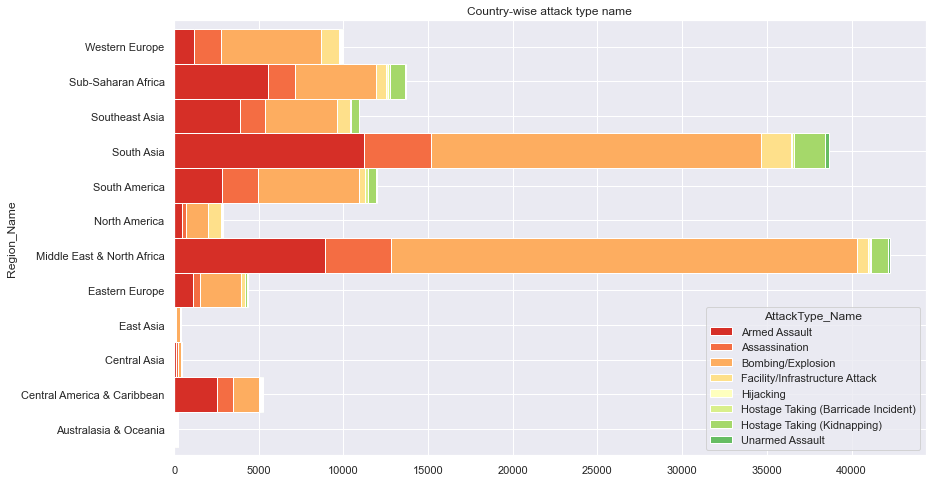

In [21]:
pd.crosstab(df.Region_Name,df.AttackType_Name).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.title('Country-wise attack type name')
plt.show()

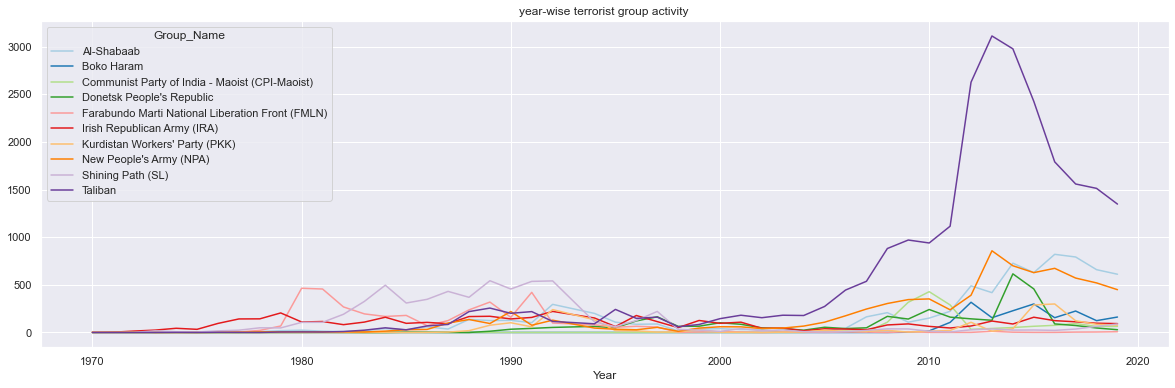

In [24]:
top_groups10=df[df['Group_Name'].isin(df['Group_Name'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group_Name).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('year-wise terrorist group activity ')
plt.show()

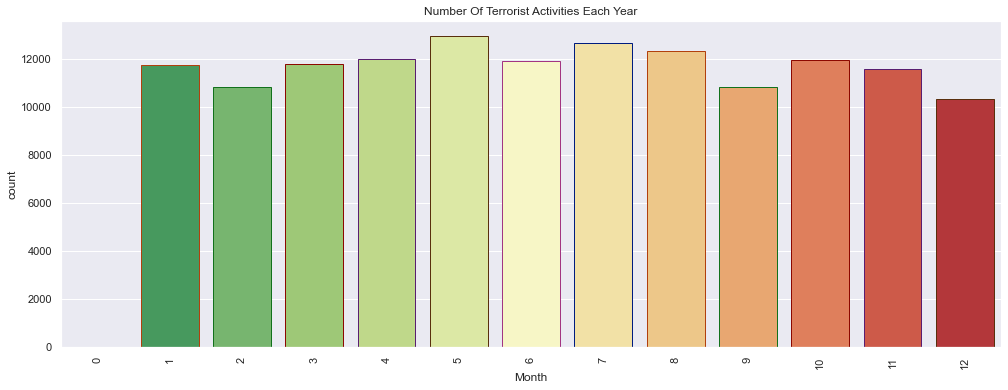

In [25]:
plt.subplots(figsize=(15,6))
sns.countplot('Month',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

In [33]:
#country = input("Enter Country Name: ")
#country = country.capitalize()
country = 'India'
#print("terrorism risk in percentage for every Days for",country, "country is as follows"),
Days = dict(df[df.Country_Name == country].groupby(['Day']).size())
Day = dict(sorted(Days.items(), key = lambda kv:(kv[1], kv[0]), reverse=True))
tot = sum(list(Days.values()))
print("Day Percentage")
for i in Days:
    print(i,' {:.2f} %'.format((Days[i]/tot)*100))
    
 #It will print terrorism risk in percentage for every Days for specific input country.   


Day Percentage
0  0.19 %
1  3.48 %
2  3.36 %
3  3.11 %
4  3.28 %
5  2.87 %
6  3.02 %
7  3.52 %
8  3.52 %
9  3.16 %
10  3.53 %
11  3.24 %
12  3.30 %
13  3.42 %
14  3.12 %
15  3.61 %
16  3.32 %
17  3.10 %
18  3.10 %
19  3.33 %
20  3.18 %
21  3.37 %
22  3.01 %
23  3.06 %
24  3.13 %
25  3.67 %
26  3.47 %
27  3.40 %
28  3.30 %
29  2.96 %
30  3.15 %
31  1.74 %


In [35]:
#country = input("Enter Country Name: ")
#country = country.capitalize()
country = 'India'
#print("terrorism risk in percentage for every months for", country,"specific input country")
months = dict(df[df.Country_Name == country].groupby(['Month']).size())
months = dict(sorted(months.items(), key = lambda kv:(kv[1], kv[0]), reverse=True))
tot = sum(list(months.values()))
#print("Entered Country: ",country)
print("Month Percentage")
for i in months:
    print(i,' {:.2f} %'.format((months[i]/tot)*100))
    
 #It will print terrorism risk in percentage for every months for specific input country.   


Month Percentage
5  10.05 %
4  9.68 %
8  9.25 %
6  9.03 %
7  9.00 %
11  8.57 %
10  8.27 %
1  8.14 %
3  7.44 %
9  7.02 %
12  6.96 %
2  6.57 %


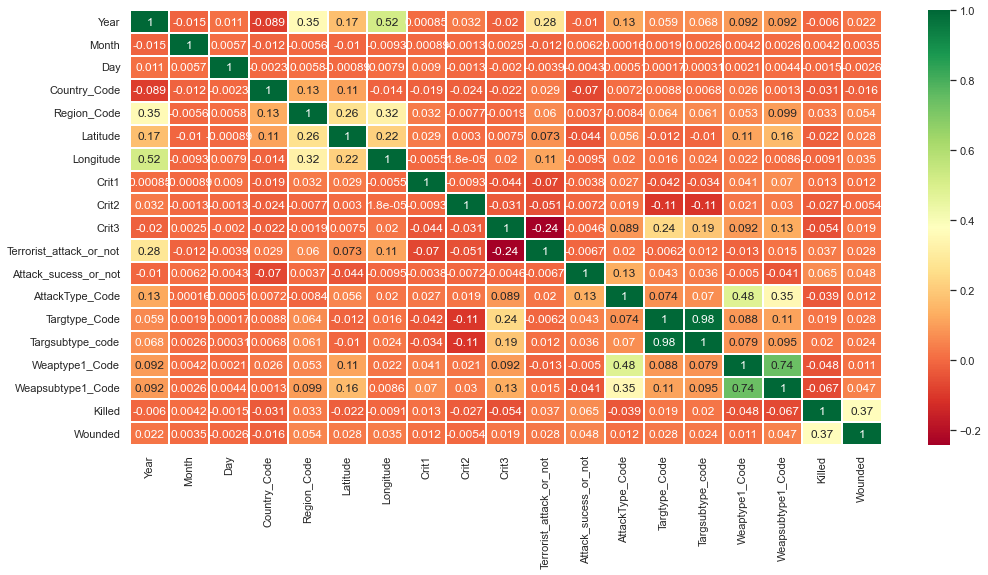

In [37]:
#Generating heatmap for correlation ploy
plt.figure(figsize=[15,8])
sns.heatmap(df.corr(),cmap='RdYlGn', linewidths=0.4, annot=True)
plt.show()